Repo Link: https://github.com/evanflaks/451Project 

# Abstract

This project aims to predict the final scores of Power 5 NCAA Division I college football games using only data available before each game, such as offensive/defensive efficiency, average points scored/allowed, and other team-level statistics. This dataset is from before college football’s conference realignment, so Power 5 is defined as Big 12, Big 10, SEC, ACC, and Pac 12. The approach involves training regression models on historical data from 2002 through January 2025. To evaluate model performance, we will compare predicted versus actual game scores using metrics like Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE), focusing on how well the model forecasts real outcomes before games are played.

# Introduction

Trying to predict college football games has always been something people care about—fans, analysts, and gamblers have all taken a shot. But with so many teams, player turnover, and the huge range in competition, it’s a tough problem. College football is messy, and that makes it a perfect testing ground for machine learning. In the past few years, ML models have gotten better at spotting patterns in noisy data, and we wanted to see what would happen if we brought that to college football.

Our goal in this project is to build a machine learning model that predicts the point differential of a game—not just who wins, but by how much. This makes it a regression problem rather than a classification one. It’s a harder task, but more useful. If a model can estimate the score margin before the game kicks off, it can help coaches with strategy, analysts with coverage, and even recruiters and NIL decision-makers with how they evaluate teams. Analytics already play a massive role in college sports, and we’re starting to see them influence recruiting priorities, gameplanning, and how programs spend their money. Fans and media can use these kinds of predictions to understand matchups better. And yeah, it could also give sports bettors an edge—but there’s risk in that too. People can overtrust models that were never meant to be perfect.

We looked at two studies that helped shape how we approached this. One was Luke Boll’s Capstone Report [@boll2023gridiron], which used a neural network to predict college football outcomes. He scraped data from TeamRankings and engineered over 1,700 features. One thing we liked about his approach was how he used football logic to drive preprocessing—for example, dropping early-season non-conference games and using Lasso regression for feature selection. That made the model more focused and realistic. We’re trying to do something similar: really think about what matters in a football game and build features that reflect that. Our plan is to customize both the inputs and the model itself so they make sense for how teams actually play today.

The other paper that stood out was by Anyama and Igiri [@anyama2015application], who used a hybrid model combining linear regression and a neural network to predict NFL outcomes. They used RapidMiner to build the pipeline and reported over 90% accuracy. Their model leaned heavily on player-level data, which works in the NFL because that info is easier to get. We don’t have that luxury in college football, so we’re going to focus on team-level data instead. But what we are borrowing is the hybrid idea—we’re planning to use both linear models and neural networks, and compare them using the same error metrics. That way we can see which approach generalizes better.

# Values Statement

The people who would use our project are mostly analysts, coaches, or fans who want a smarter way to talk about college football. Our model helps predict how much one team might beat another by—before the game even starts—so it gives a more detailed picture than just guessing the winner. But there are other people who might be affected too. Sports bettors could easily take something like this and try to build it into their strategy. Reporters might use it to shape narratives around teams or players, and that’s not always neutral.

The ones who benefit most are the people trying to make sense of the game. Coaches could use this to guide decisions. Analysts get a new layer of data. Even fans get something more objective to add to the conversation. But there’s a flip side too—someone betting based on this could lose money, or a model like ours could be overhyped and treated as more accurate than it really is. That kind of overconfidence is dangerous, especially with something as unpredictable as college football.

We were interested in this because we’ve lived the sport. We know how much talk there is during the week—rankings, spreads, predictions—and we wanted to build something that cuts through that noise a little. This felt like a chance to combine the world we know from playing with the technical tools we’ve picked up in class. It also gave us a reason to go deep on something we’ve always cared about, but from a new angle.

Does this make the world more just or joyful? Probably not in a dramatic way. But if it makes the sport a little more transparent, or helps someone understand the game in a smarter way, or even just makes predictions a bit more grounded in real data—that’s still a step in the right direction. We’re not trying to build the next Vegas. We just wanted to see what was possible with the data that’s already out there.

# Materials and Methods

We used a dataset from Kaggle titled [[“College Football Team Stats: 2002 to January 2024”](https://www.kaggle.com/datasets/cviaxmiwnptr/college-football-team-stats-2002-to-january-2024/data)], originally uploaded by user cviaxmiwnptr. The dataset includes team-level statistics for NCAA Division I college football games across more than 20 seasons. It doesn't explicitly say, but our guess is that it was likely scraped from either ESPN or NCAA’s official site. The Kaggle page doesn’t specify a clear pipeline or methodology for how the data was gathered, which is a limitation. We checked a few random games against NCAA's official website and these rows matched reality.

Each row in the dataset represents a single college football game, and the columns capture a wide range of game-level statistics—things like rushing yards, passing efficiency, turnovers, penalties, time of possession, and more. The data is separated into home and away team stats, and includes fields for final scores, team names, dates, and whether the game was played at a neutral site. For our project, we filtered this dataset to include only games played by Power 5 conference teams (SEC, Big Ten, ACC, Pac-12, Big 12) after 2002, and we focused only on data that would have been available before each game.

There are some limitations here. First, this dataset doesn’t include player-level stats or injury reports, which can have a major impact on game outcomes. It also doesn’t capture off-the-field context—like weather, coaching changes, or travel distance—which could affect performance but aren’t represented in the numbers. There's also some inconsistency in missing values and conference naming (for example, due to realignment over the years), which we had to clean up during preprocessing. And finally, because this is scraped historical data, there's always a chance of errors or incomplete entries, especially in older seasons.

Despite those gaps, the dataset is solid for what we were trying to do. It’s large, covers over 20 years of games, and includes many of the core stats teams actually care about when preparing for a matchup. That said, it doesn’t represent the full story behind every game—and our model can only be as good as the data it learns from.


We started this project by building a simple linear regression model as our baseline. At first, the results looked great—our RMSE was low and the residuals were clean. But the model was doing too well, and we quickly realized why: we were using in-game stats to predict the final score. If a team threw for 500 yards in a game, the model would just learn that and predict a high score—not exactly helpful if you're trying to make a prediction before the game starts. So we went back and reworked the feature set.

We changed our inputs to only include team stats available before each game, using averages up to that point in the season. That made our setup more realistic. From there, we refined it further by calculating 4-week rolling averages for every team stat. This helped capture recent team performance and was way more aligned with how coaches and analysts actually scout games. Each one of these changes chipped away at our error and improved the model's ability to generalize.

Once we felt good about the features, we moved on to a neural network built in PyTorch. We started with a basic feedforward structure and slowly optimized it. We tried different numbers of hidden layers, units per layer, dropout rates, and learning rates. We trained using the Adam optimizer and used scaled features (StandardScaler) across the board. During this phase, we used the 2023 season for cross-validation, holding it out to tune hyperparameters before running final tests on the 2024 data. Each change we made—whether it was in architecture or training settings—brought steady improvements.

We also experimented with custom loss functions to better reflect what matters in a football game. One function added weight to errors within a field goal margin, since those are the types of predictions that really matter in close games. Another penalized the model more when it underpredicted blowouts, which we noticed was a pattern early on in our residual plots.

One of our final tweaks was surprisingly simple: we realized we hadn’t included points per game as a feature. We had assumed it was already in the dataset, but it wasn’t. Once we calculated and added it in, our error dropped again. That ended up being one of the most predictive features in the whole model—proof that sometimes the most obvious stats can still carry a lot of value.

We trained everything locally on CPUs. For evaluation, we used Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE). Our test set was made up of games from the 2024 season, while all games prior to that were used for training. This setup ensured that the model was always predicting the future, not just fitting the past. We also used plots like residuals vs. predicted and actual vs. predicted to better understand where the model was performing well (or not).

We didn’t run a formal audit for bias, but we did notice some patterns. The model occasionally struggled with games that ended in blowouts or major upsets, and it tended to overpredict when the teams were evenly matched. We also focused only on Power 5 games, which improved consistency but made the model less applicable to smaller schools. That tradeoff was intentional—we prioritized data quality and relevance over full generalization.

# Results

We experimented with four different modeling strategies for predicting college football scores: a baseline linear regression model, a regression model with rolling averages, a parameter-tuned neural network, and a random forest. We report each model’s performance across home and away scores using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R².

Our baseline linear regression, which naively used current-game stats like total passing yards, initially gave suspiciously strong results—because it was predicting on data from within the game. Once we corrected that to only use stats available before kickoff, performance naturally dropped, with Home MSE at 166.80 and Away MSE at 158.72. Still, this served as a good starting point.

The next iteration introduced rolling averages (a 4-week trailing mean), which made the features more realistic and reflective of a team’s form. This cut down the error noticeably, especially for away teams, where MSE dropped to 138.24 and MAE to 9.60. It was a reminder that in college football, recent performance trends matter more than raw season averages.

We then implemented a custom neural network. We tuned dropout, learning rate, hidden layer size, and weight decay, and also tested several loss functions. Our best network slightly edged out the rolling regression for Away MSE (136.80) and showed solid performance for Home predictions (MSE: 153.00), but didn't drastically outperform. The R² scores hovered just above 0.10—a modest improvement, but consistent.

Lastly, we ran a Random Forest model. Despite being a more interpretable tree-based method, it performed roughly on par with the neural net. It posted MSEs of 153.42 (home) and 135.99 (away) with nearly identical MAE and R² values to the neural net. What’s interesting is that the feature importance output from the Random Forest lined up with our intuitions—team offensive efficiency and points-per-game came out as the most predictive.

Across the board, away scores were easier to predict than home scores, which was surprising given home-field advantage is such a commonly discussed factor. Our working theory is that variance is higher for home teams—more fan and coaching pressure, or just noise.

Ultimately, no model was a silver bullet. All performed in the same ballpark, with MAE in the 9.5–10.4 range. Still, the neural network gave us the most flexibility to tune custom objectives and loss functions, and that's where we saw the most potential for future improvements. Every time we iterated—rolling averages, tuning layers, adjusting dropout—the model nudged forward. This project really showed us that small refinements and football-specific engineering go a long way in a messy dataset like this.

$$
\begin{array}{lcccccc}
\textbf{Model} & \textbf{Home MSE} & \textbf{Home MAE} & \text{Home } R^2 & \textbf{Away MSE} & \textbf{Away MAE} & \text{Away } R^2 \\
\hline
\text{Baseline (No RA)} & 166.80 & 10.40 & 0.132 & 158.72 & 10.18 & 0.136 \\
\text{Regression (RA)}  & 152.29 & 10.05 & 0.112 & 138.24 & 9.60 & 0.099 \\
\text{NN (Tuned)}       & 153.00 & 10.06 & 0.108 & 136.80 & 9.57 & 0.109 \\
\text{Random Forest}    & 153.42 & 10.10 & 0.106 & 135.99 & 9.45 & 0.114 \\
\end{array}
$$


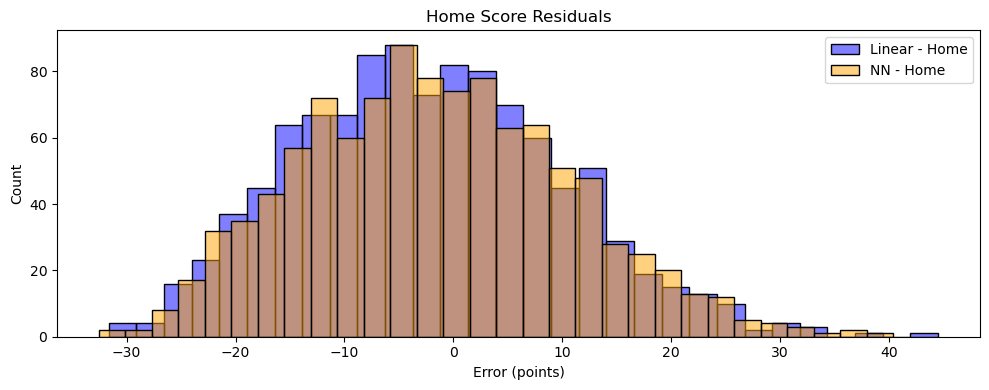

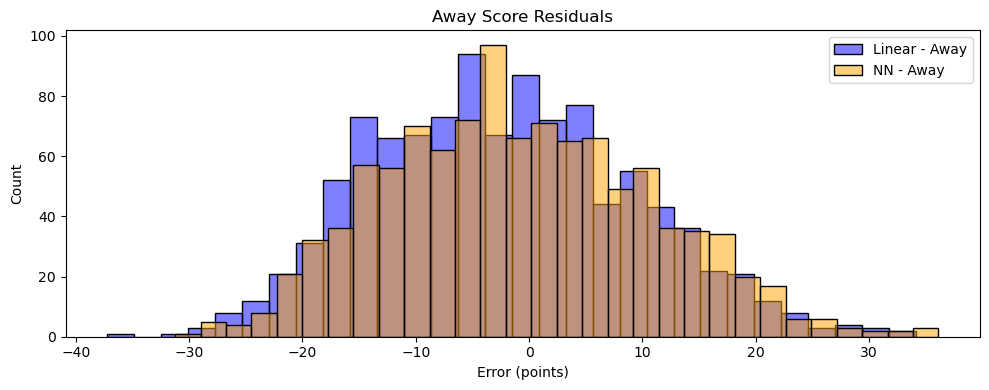

One of the biggest takeaways from the residual plots is how close the neural net and linear regression models really were. Despite building a fairly deep architecture—with four layers, batch normalization, ReLU activations, and dropout for regularization—the NN didn’t drastically outperform the rolling linear model. That said, the residuals for the NN are slightly tighter on away scores, and the MAE confirms a small advantage. This reinforces a core theme from the project: marginal gains. Every layer we added, every dropout tweak, every tuning of hidden sizes nudged the model forward just a bit—but the gains were incremental. It also highlighted the strength of a simple, well-engineered linear model when using meaningful features like rolling averages. In a domain as noisy and chaotic as college football, even a custom multi-layer network can only do so much better than a smart baseline.

# Concluding Discussion

The goal of this project was to develop a machine learning model capable of predicting the final scores of NCAA Division I football games between Power Five teams using historical box score data. We engineered rolling average features, created delta-based predictors, and tested multiple modeling approaches including linear regression, random forests, and a custom neural network. While the modeling process was methodologically sound and the pipeline was well-structured, the predictive performance of our models was ultimately limited.

Our baseline linear regression model produced Mean Absolute Errors (MAEs) of 10.69 for home scores and 10.02 for away scores. The improved linear regression model, which incorporated delta features and rolling windows, offered slight improvements, reducing MAEs to 10.05 (home) and 9.60 (away). Our custom neural network model, trained with tailored loss functions and hyperparameter tuning, performed similarly with MAEs of 10.06 and 9.57, and R² values of approximately 0.11 for both home and away scores.

When compared to a random guessing baseline—where scores were drawn from the historical distribution of past games—our models did outperform in terms of MAE, but not by a wide margin. The random baseline produced MAEs of 15.61 (home) and 15.33 (away), which demonstrates that our models captured some structure in the data, but their improvements were moderate and far from highly accurate.

To contextualize our results, it's helpful to compare them with performance benchmarks from higher-level models used in professional sports analytics and betting markets. Industry-leading score prediction models, such as those developed by sportsbooks or advanced analytics firms like ESPN's Football Power Index (FPI) or FiveThirtyEight's Elo-based models, typically achieve MAEs in the range of 6 to 8 points per team. These models often incorporate proprietary data, expert-curated priors, real-time injury reports, betting line adjustments, and player-level inputs–none of which were available in our project. Given these constraints, our model’s MAEs in the low 9 to 10 range represent a decent first step, but fall short of the accuracy achieved by more sophisticated or data-rich systems.

These results indicate that predicting college football scores is a challenging task, even with detailed historical data. Game outcomes can hinge on unrecorded factors such as injuries, weather, coaching decisions, and in-game dynamics—none of which were captured in our dataset. Unlike classification problems such as predicting win/loss outcomes, score regression requires precise modeling of many noisy components, which proved difficult with the features available.

If we had access to richer data, including player-level information, team depth charts, betting lines, and environmental conditions, we believe performance could be significantly improved. Additional time and computational resources would also allow us to experiment with more complex architectures, such as gradient-boosted trees or attention-based neural networks, and to run more extensive hyperparameter searches.
While our models did not achieve high predictive accuracy, the project met its broader goals of building a working pipeline, exploring different modeling techniques, and understanding the strengths and limitations of statistical prediction in sports. These insights are valuable not only for refining future models but also for appreciating the unpredictability and complexity of college football itself.



# Group Contributions

### Jackson

Jackson led the development of the neural network model using PyTorch, including the custom FootballNet architecture and the integration of multiple domain-specific loss functions. He also ran and logged the hyperparameter grid search, analyzed the model performance metrics, and compared results across all modeling approaches. Jackson was responsible for writing the abstract, introduction, values statement, and results sections of the blog post and ensured that the final write-up communicated both the technical depth and the broader implications of the project. He also contributed to debugging and optimizing the full modeling pipeline on GitHub. 


### Evan

Evan was primarily responsible for implementing and refining the feature engineering pipeline, including the creation of rolling averages and delta features. He handled the data cleaning process, managed the chronological train/validation/test split, and contributed significantly to the exploratory data analysis. Evan also led the implementation and tuning of the baseline and improved linear regression models, and he created several key visualizations—such as the residual plots and calibration graphs—for the final blog post. Evan wrote the remaining sections of the blog post that Jackson did not. 

# Personal Reflections

### Evan 

Through the process of researching, implementing, and communicating this project, I gained a much deeper and more technical understanding of the challenges involved in predicting college football scores using machine learning. Although I had experience working with data in the past, this project pushed me to engage more critically with the concepts of data representation and feature quality. Feature engineering quickly emerged as the most impactful and difficult part of the pipeline. I developed rolling average features across key statistics like total yards, penalties, turnovers, and third-down efficiency, applying temporal shifting and group-based aggregation to ensure that the model only had access to past information. I also transformed team-level stats into matchup-specific features by calculating home vs. away differentials, a step that significantly improved model structure and interpretability. This process taught me how important it is to encode domain knowledge into the feature space before reaching for more complex models.

Despite thoughtful engineering, I learned how difficult it is to map even carefully constructed features to accurate continuous predictions—especially for an outcome as noisy and multifactorial as college football scores. My initial hope was to build a model that could rival benchmarks from industry-grade systems or betting markets. In reality, my best-performing model, a custom neural network trained with domain-specific loss functions, achieved a mean absolute error of about 9.6 points. While this was a measurable improvement over a random guessing baseline, it was still a bit behind the 6–8 MAE typically achieved by top-performing systems that rely on proprietary or real-time data inputs. In that sense, I fell short of my original performance goals. Still, I consider the project a success in terms of what I learned. I now better understand the difference between model complexity and predictive power—and how gains often come from improving data inputs rather than relying solely on more advanced algorithms.

This experience has reshaped how I’ll approach future data science projects, both academically and professionally. I’ve come to appreciate the massive influence of feature engineering, especially in structured prediction tasks where raw data alone fails to reveal strong trends. I now think more carefully about time-aware validation splits, information leakage, and the need to align features with the task’s  context. I also learned to expect setbacks—whether it’s disappointing performance metrics or debugging obscure errors in PyTorch—and to view those moments as opportunities to refine my approach. Going forward, I’ll carry these lessons into future coursework, applied analytics roles, and personal projects. If anything, this project reminded me that modeling is often the final step—and that the real work lies in shaping the data in ways that truly reflect the complexity of the world we’re trying to model.

### Jackson

One of the biggest things I learned in this project is just how important it is to work on something you genuinely care about. As someone who loves college football, this didn’t feel like just another school assignment. I actually looked forward to digging into the data, understanding the metrics, and thinking about how different features could connect to the outcome of a game. It’s way easier to stay focused and motivated when the problem feels fun. That buy-in made everything—researching, debugging, refining the model—feel worth it.

I also came in with the assumption that machine learning would be more “automatic.” Like, I thought the neural network would just destroy the linear model because it’s more complex and has more buzz around it. But what I found is that progress in ML isn’t magic—it’s usually a series of small, gritty improvements. We spent hours tuning our NN’s dropout rate, learning rate, and hidden layers, and still ended up only slightly edging out our rolling linear regression. That was humbling. And honestly, the biggest jumps in performance didn’t even come from the neural net tuning—they came from the feature engineering. It’s easy to get caught up in the training loop and think that optimizing the model is where all the gains are made, but most of our improvements came when we started using better inputs: switching from in-game stats to pre-game averages, rolling windows, and even just realizing we needed to calculate something as basic as points per game. That part really stuck with me.

In terms of goals, I feel like we hit the mark. Our model didn’t blow past expectations in terms of performance, but I think the way we iterated, tested, and explained our choices showed a lot of growth. I’m proud of the way we approached the project methodically. It wasn’t about chasing the flashiest metrics—it was about building something that made sense and learning from every step along the way.

I’ll definitely carry this experience with me. Not just technically—though I do feel more confident implementing and debugging models now—but also in terms of project ownership. Choosing a topic that intersects with your interests makes everything click more naturally. I’ll look for that alignment in future classes and eventually in my career. If I can keep working on problems I actually care about, I know I’ll be way more engaged, and the quality of my work will follow.